<a href="https://colab.research.google.com/github/flydragon2018/colab_notebooks/blob/main/steel_grainsize_faiss_search_demo_912.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##https://www.oreilly.com/library/view/practical-deep-learning/9781492034858/ch04.html

In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [50]:
! unzip -q  /content/drive/MyDrive/hw/2021hwjx-data-train.zip -d /content/

replace /content/train/10.0/100-100-10.0-500x.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [51]:
!pip install  faiss-cpu==1.7.1

In [52]:
!cp /content/drive/MyDrive/hw/goldsize/train.csv ./

In [53]:
!pip install scikit-learn==0.24.2

In [54]:
import os
import numpy as np
import pandas as pd
import faiss

In [55]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input 

 
 



In [56]:
for r, d, f in os.walk("/content/train"):
  print(r,d,f)

/content/train ['6.5', '13.0', '9.5', '7.0', '12.5', '11.5', '10.0', '10.5', '8.0', '8.5', '7.5', '12.0', '11.0', '9.0'] []
/content/train/6.5 [] ['124-102-6.5-500x.jpg', '108-102-6.5-500x.jpg', '126-101-6.5-500x.jpg', '121-103-6.5-500x.jpg', '136-103-6.5-500x.jpg', '152-100-6.5-500x.jpg', '139-102-6.5-500x.jpg', '165-101-6.5-500x.jpg', '194-102-6.5-500x.jpg', '120-101-6.5-500x.jpg', '185-101-6.5-500x.jpg', '161-101-6.5-500x.jpg', '176-102-6.5-500x.jpg', '128-102-6.5-500x.jpg', '164-101-6.5-500x.jpg', '161-102-6.5-500x.jpg', '148-101-6.5-500x.jpg', '159-101-6.5-500x.jpg', '123-103-6.5-500x.jpg', '118-101-6.5-500x.jpg', '157-102-6.5-500x.jpg', '192-102-6.5-500x.jpg', '134-101-6.5-500x.jpg', '160-101-6.5-500x.jpg', '158-100-6.5-500x.jpg', '131-103-6.5-500x.jpg', '193-100-6.5-500x.jpg', '176-103-6.5-500x.jpg', '138-103-6.5-500x.jpg', '181-100-6.5-500x.jpg', '115-101-6.5-500x.jpg', '184-103-6.5-500x.jpg', '180-103-6.5-500x.jpg', '168-102-6.5-500x.jpg', '120-100-6.5-500x.jpg', '185-102-6.5-

In [57]:
traindf=pd.read_csv("./train.csv")
traindf.head()

img_path_id  label
0  154-101-7.5-500x.jpg    7.5
1  151-103-7.5-500x.jpg    7.5
2  118-100-7.5-500x.jpg    7.5
3  106-102-7.5-500x.jpg    7.5
4  105-102-7.5-500x.jpg    7.5

In [58]:
import os
files = []
datadir="/content/train"
for r, d, f in os.walk(datadir):
    for file in f:
        if ('.jpg' in file):
            exact_path = os.path.join(r,file)
            files.append(exact_path)

In [59]:
print(len(files))

4222


In [60]:
# import model for feature vector extraction

In [61]:
#building index

In [62]:
#search image in index 

In [63]:
import cv2

In [ ]:
# add pooling='max' to feature extractor model, will reduce ouput feature dimensions 

In [64]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [65]:
features = extract_features('/content/train/6.5/100-100-6.5-500x.jpg', model)
print(len(features))

100352


In [66]:
100352/2048

49.0

In [67]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
     
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))

                counter += 1
    return file_list

In [68]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_id_list(root_dir):
    file_list = []
    classid_list=[]
    classid_file_list=[]
    counter = 1
    for d in os.listdir(root_dir):
        #print(d)
        sub_d=os.path.join(root_dir,d)
        for filename in os.listdir(sub_d):
            if any(ext in filename for ext in extensions):
                fullpath=os.path.join(sub_d, filename)
                file_list.append(fullpath)
                classid_list.append(d)
                classid_file_list.append([d,fullpath])
                if counter%100==0:
                  print(d,fullpath)

                counter += 1
    return file_list,classid_list,classid_file_list

In [69]:
root_dir="/content/train"
filenames, classids,  classid_files = get_file_id_list(root_dir) 

6.5 /content/train/6.5/109-100-6.5-500x.jpg
6.5 /content/train/6.5/121-100-6.5-500x.jpg
6.5 /content/train/6.5/128-100-6.5-500x.jpg
13.0 /content/train/13.0/137-100-13.0-500x.jpg
13.0 /content/train/13.0/157-103-13.0-500x.jpg
9.5 /content/train/9.5/162-102-9.5-500x.jpg
9.5 /content/train/9.5/215-103-9.5-500x.jpg
9.5 /content/train/9.5/119-101-9.5-500x.jpg
9.5 /content/train/9.5/209-103-9.5-500x.jpg
9.5 /content/train/9.5/214-103-9.5-500x.jpg
7.0 /content/train/7.0/168-101-7.0-500x.jpg
7.0 /content/train/7.0/135-101-7.0-500x.jpg
12.5 /content/train/12.5/135-100-12.5-500x.jpg
12.5 /content/train/12.5/151-102-12.5-500x.jpg
11.5 /content/train/11.5/139-101-11.5-500x.jpg
11.5 /content/train/11.5/132-101-11.5-500x.jpg
10.0 /content/train/10.0/181-100-10.0-500x.jpg
10.0 /content/train/10.0/151-101-10.0-500x.jpg
10.0 /content/train/10.0/180-100-10.0-500x.jpg
10.0 /content/train/10.0/156-101-10.0-500x.jpg
10.5 /content/train/10.5/165-103-10.5-500x.jpg
10.5 /content/train/10.5/145-102-10.5-500x.

In [70]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/4222 [00:00<?, ?it/s]

In [71]:
pickle.dump(feature_list, open('./features-hwsteel-resnet.pickle', 'wb'))
pickle.dump(filenames, open('./filenames-hwsteel.pickle','wb'))

In [72]:
pickle.dump(classid_files, open('./classid-files-hwsteel.pickle','wb'))

In [73]:
!cp *.pickle  /content/drive/MyDrive/hw/goldsize/

In [117]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

In [118]:
filenames[0]

'/content/train/6.5/124-102-6.5-500x.jpg'

In [119]:
distances, indices = neighbors.kneighbors([feature_list[0]])

In [120]:
indices

array([[   0,  168,  182,   90,  186,  102,  158,  296, 3014,  334]])

In [121]:
for i in indices[0]:
  print(classid_files[int(i)])

['6.5', '/content/train/6.5/124-102-6.5-500x.jpg']
['6.5', '/content/train/6.5/127-100-6.5-500x.jpg']
['6.5', '/content/train/6.5/146-103-6.5-500x.jpg']
['6.5', '/content/train/6.5/171-100-6.5-500x.jpg']
['6.5', '/content/train/6.5/108-103-6.5-500x.jpg']
['6.5', '/content/train/6.5/163-103-6.5-500x.jpg']
['6.5', '/content/train/6.5/130-101-6.5-500x.jpg']
['6.5', '/content/train/6.5/102-102-6.5-500x.jpg']
['7.5', '/content/train/7.5/105-101-7.5-500x.jpg']
['6.5', '/content/train/6.5/153-102-6.5-500x.jpg']


In [122]:
labels=[ classid_files[int(x)][0] for x in indices[0] ]
labels

['6.5', '6.5', '6.5', '6.5', '6.5', '6.5', '6.5', '6.5', '7.5', '6.5']

In [123]:
max(labels,key=labels.count)

'6.5'

In [103]:
len(feature_list)

4222

In [128]:
newlabeldf=[]
for i in range(len(feature_list)):
  distances, indices = neighbors.kneighbors([feature_list[i]])
  # get class count and sorting 
  labels=[ classid_files[int(x)][0] for x in indices[0] ]
  newlabel=max(labels,key=labels.count)
  newlabeldf.append([filenames[i],newlabel])
  print(i,filenames[i],newlabel)


0 /content/train/6.5/124-102-6.5-500x.jpg 6.5
1 /content/train/6.5/108-102-6.5-500x.jpg 6.5
2 /content/train/6.5/126-101-6.5-500x.jpg 6.5
3 /content/train/6.5/121-103-6.5-500x.jpg 6.5
4 /content/train/6.5/136-103-6.5-500x.jpg 7.5
5 /content/train/6.5/152-100-6.5-500x.jpg 6.5
6 /content/train/6.5/139-102-6.5-500x.jpg 6.5
7 /content/train/6.5/165-101-6.5-500x.jpg 6.5
8 /content/train/6.5/194-102-6.5-500x.jpg 6.5
9 /content/train/6.5/120-101-6.5-500x.jpg 6.5
10 /content/train/6.5/185-101-6.5-500x.jpg 6.5
11 /content/train/6.5/161-101-6.5-500x.jpg 6.5
12 /content/train/6.5/176-102-6.5-500x.jpg 7.5
13 /content/train/6.5/128-102-6.5-500x.jpg 6.5
14 /content/train/6.5/164-101-6.5-500x.jpg 6.5
15 /content/train/6.5/161-102-6.5-500x.jpg 6.5
16 /content/train/6.5/148-101-6.5-500x.jpg 6.5
17 /content/train/6.5/159-101-6.5-500x.jpg 6.5
18 /content/train/6.5/123-103-6.5-500x.jpg 6.5
19 /content/train/6.5/118-101-6.5-500x.jpg 6.5
20 /content/train/6.5/157-102-6.5-500x.jpg 6.5
21 /content/train/6.5/1

In [129]:
new_traindf=pd.DataFrame(newlabeldf, columns=['imgpath','label'])

In [130]:
new_traindf.to_csv("new_train.csv",index=False)

In [131]:
!cp /content/new_train.csv /content/drive/MyDrive/hw/goldsize

In [132]:
new_traindf.head()

imgpath label
0  /content/train/6.5/124-102-6.5-500x.jpg   6.5
1  /content/train/6.5/108-102-6.5-500x.jpg   6.5
2  /content/train/6.5/126-101-6.5-500x.jpg   6.5
3  /content/train/6.5/121-103-6.5-500x.jpg   6.5
4  /content/train/6.5/136-103-6.5-500x.jpg   7.5

In [133]:
!mkdir -p /content/data/train

In [137]:
for d in os.listdir("/content/train"):
  print(d)
  os.makedirs("/content/data/train/{}".format(d))

6.5
13.0
9.5
7.0
12.5
11.5
10.0
10.5
8.0
8.5
7.5
12.0
11.0
9.0


In [147]:
new_traindf.head()

imgpath label
0  /content/train/6.5/124-102-6.5-500x.jpg   6.5
1  /content/train/6.5/108-102-6.5-500x.jpg   6.5
2  /content/train/6.5/126-101-6.5-500x.jpg   6.5
3  /content/train/6.5/121-103-6.5-500x.jpg   6.5
4  /content/train/6.5/136-103-6.5-500x.jpg   7.5

In [144]:
new_traindf.columns

Index(['imgpath', 'label'], dtype='object')

In [159]:
import shutil
for i in range(len(new_traindf)):
  s=new_traindf['imgpath'][i]
  d= new_traindf['label'][i]
  t="/content/data/train/{}/".format(d)
  print(i,s,d,t)                                  
  shutil.copy(s,t)

  #if i==3: break


0 /content/train/6.5/124-102-6.5-500x.jpg 6.5 /content/data/train/6.5/
1 /content/train/6.5/108-102-6.5-500x.jpg 6.5 /content/data/train/6.5/
2 /content/train/6.5/126-101-6.5-500x.jpg 6.5 /content/data/train/6.5/
3 /content/train/6.5/121-103-6.5-500x.jpg 6.5 /content/data/train/6.5/
4 /content/train/6.5/136-103-6.5-500x.jpg 7.5 /content/data/train/7.5/
5 /content/train/6.5/152-100-6.5-500x.jpg 6.5 /content/data/train/6.5/
6 /content/train/6.5/139-102-6.5-500x.jpg 6.5 /content/data/train/6.5/
7 /content/train/6.5/165-101-6.5-500x.jpg 6.5 /content/data/train/6.5/
8 /content/train/6.5/194-102-6.5-500x.jpg 6.5 /content/data/train/6.5/
9 /content/train/6.5/120-101-6.5-500x.jpg 6.5 /content/data/train/6.5/
10 /content/train/6.5/185-101-6.5-500x.jpg 6.5 /content/data/train/6.5/
11 /content/train/6.5/161-101-6.5-500x.jpg 6.5 /content/data/train/6.5/
12 /content/train/6.5/176-102-6.5-500x.jpg 7.5 /content/data/train/7.5/
13 /content/train/6.5/128-102-6.5-500x.jpg 6.5 /content/data/train/6.5/
14

In [160]:
 !zip -r data.zip   /content/data/train

  adding: content/data/train/ (stored 0%)
  adding: content/data/train/6.5/ (stored 0%)
  adding: content/data/train/6.5/132-103-7.0-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/124-102-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/108-102-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/126-101-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/121-103-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/169-102-7.0-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/152-100-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/139-102-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/165-101-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/194-102-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/120-101-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/185-101-6.5-500x.jpg (deflated 0%)
  adding: content/data/train/6.5/161-101-6.5-500x.jpg (deflated 0%)
  adding: content/data/train

In [162]:
!ls -l data.zip

-rw-r--r-- 1 root root 1781183108 Sep 12 17:37 data.zip


In [ ]:
!cp data.zip /content/drive/MyDrive/hw/goldsize

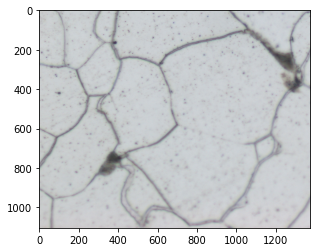

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
       # Show the plots as a cell within the Jupyter Notebooks
plt.imshow(mpimg.imread(filenames[0]))

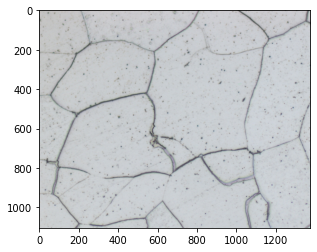

In [78]:
plt.imshow(mpimg.imread(filenames[168]))

In [79]:
for i in range(5):
    print(distances[0][i])

9.541399e-08
0.85954994
0.8614497
0.86201376
0.86958027


In [80]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]
# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]
# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.

 

In [81]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from PIL  import Image
def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()
    
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.3, axis=axis)
    plt.show()

def tsne_to_grid_plotter_manual(x, y, selected_filenames):
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()



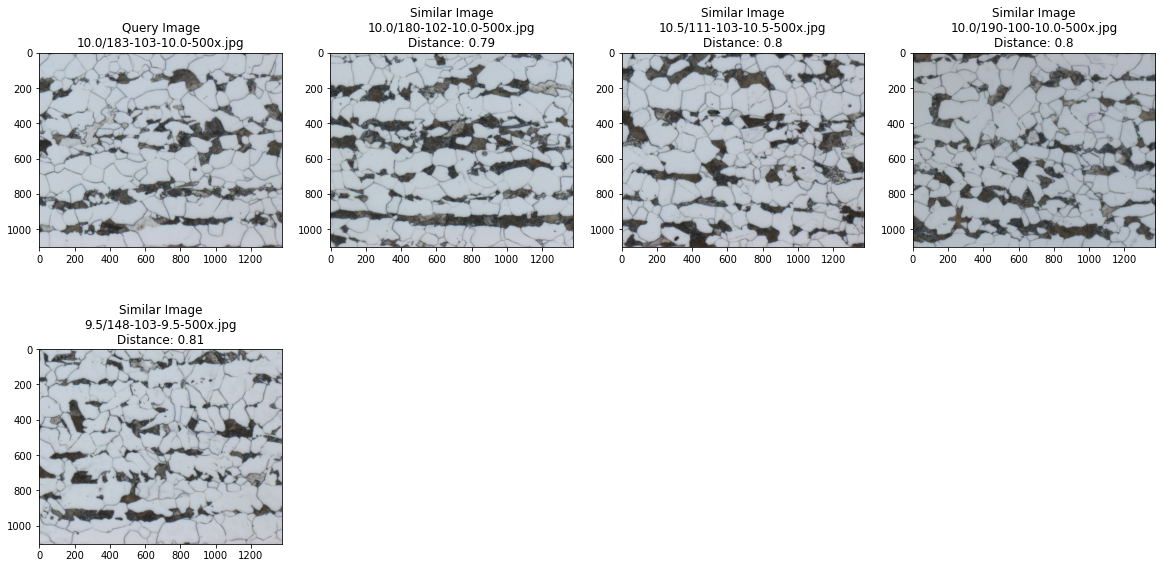

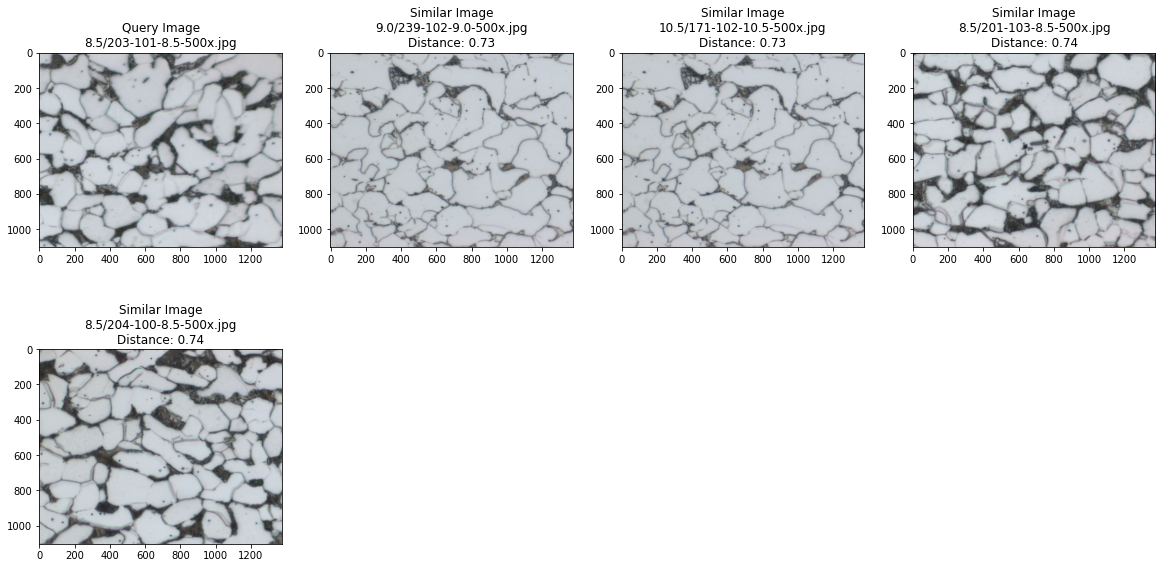

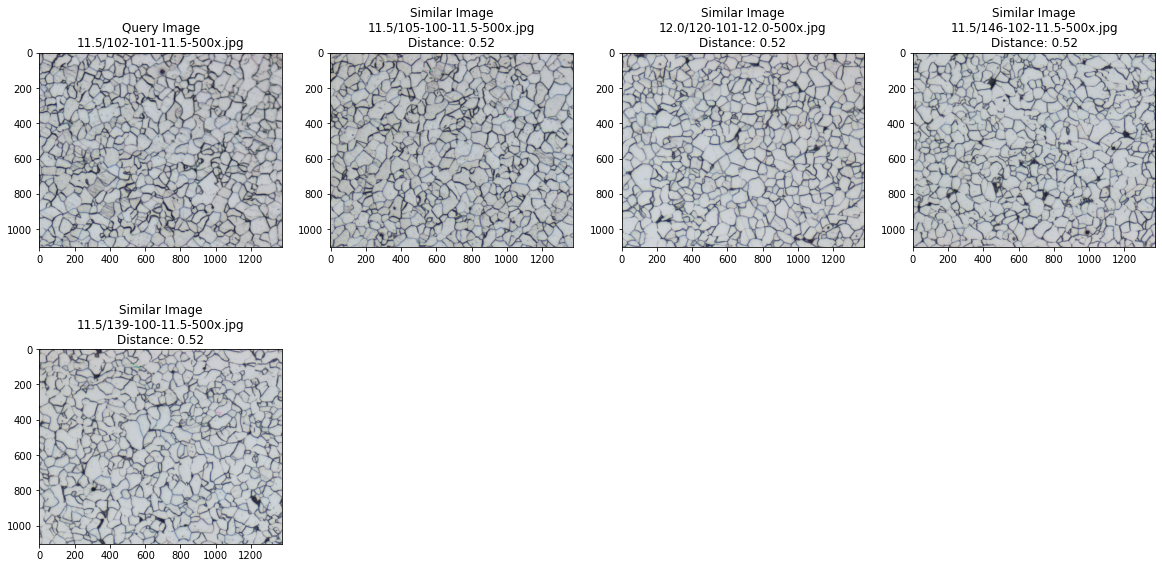

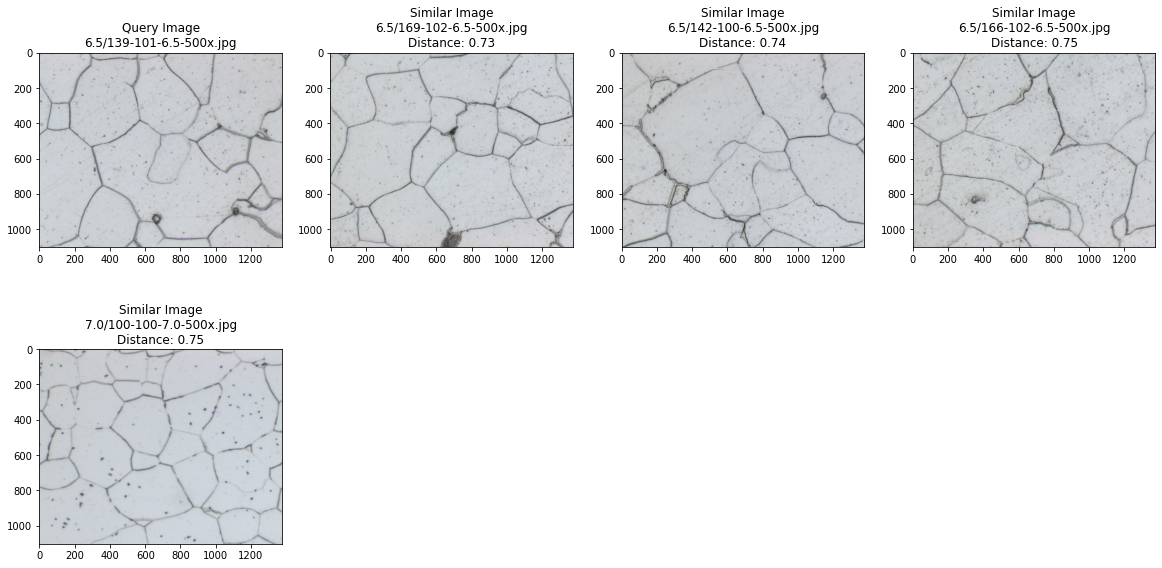

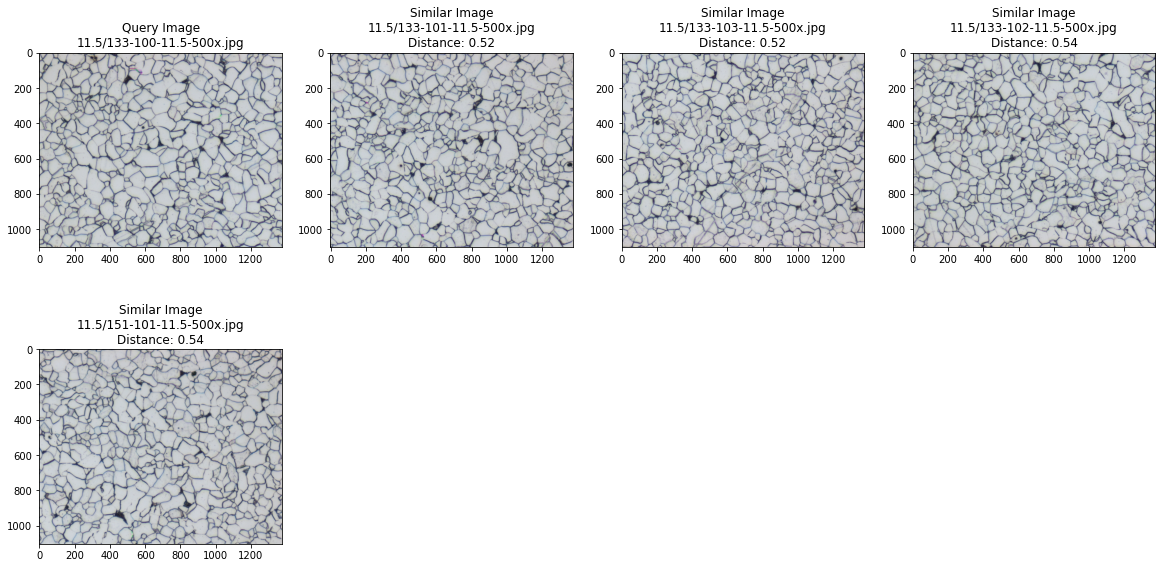

In [82]:
import random
for i in range(5):
    #random_image_index = random.randint(0,num_images)
    random_image_index = random.randint(0,4222)
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] +[filenames[indices[0][i]] for i in range(1,5)]
    plot_images(similar_image_paths, distances[0])

In [83]:
# Perform PCA over the features
from sklearn.decomposition import PCA
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [84]:
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed
#selected_class_ids = class_ids

selected_filenames = filenames 

In [85]:
selected_features.shape

(4222, 100)

In [86]:
from sklearn.manifold import TSNE

In [87]:
tsne_results =TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4222 samples in 0.001s...
[t-SNE] Computed neighbors for 4222 samples in 0.759s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4222
[t-SNE] Computed conditional probabilities for sample 2000 / 4222
[t-SNE] Computed conditional probabilities for sample 3000 / 4222
[t-SNE] Computed conditional probabilities for sample 4000 / 4222
[t-SNE] Computed conditional probabilities for sample 4222 / 4222
[t-SNE] Mean sigma: 0.133867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.237991
[t-SNE] KL divergence after 1000 iterations: 1.231270


In [88]:
'''

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()
'''

'\n\n# Import libraries\nfrom mpl_toolkits import mplot3d\nimport numpy as np\nimport matplotlib.pyplot as plt\n \n \n# Creating dataset\nz = np.random.randint(100, size =(50))\nx = np.random.randint(80, size =(50))\ny = np.random.randint(60, size =(50))\n \n# Creating figure\nfig = plt.figure(figsize = (10, 7))\nax = plt.axes(projection ="3d")\n \n# Creating plot\nax.scatter3D(x, y, z, color = "green")\nplt.title("simple 3D scatter plot")\n \n# show plot\nplt.show()\n'

In [89]:
colorids=[float(x) for x in classids]

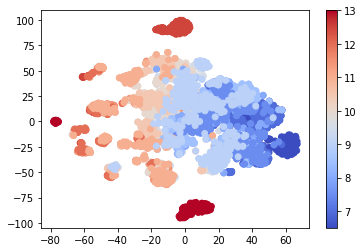

In [90]:
# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], c =colorids, cmap=colormap)
#scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])

plt.colorbar(scatter_plot)
plt.show()

In [91]:
tsne3_results =TSNE(n_components=3,verbose=1,metric='euclidean').fit_transform(selected_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4222 samples in 0.001s...
[t-SNE] Computed neighbors for 4222 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4222
[t-SNE] Computed conditional probabilities for sample 2000 / 4222
[t-SNE] Computed conditional probabilities for sample 3000 / 4222
[t-SNE] Computed conditional probabilities for sample 4000 / 4222
[t-SNE] Computed conditional probabilities for sample 4222 / 4222
[t-SNE] Mean sigma: 0.133867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.641739
[t-SNE] KL divergence after 1000 iterations: 1.059464


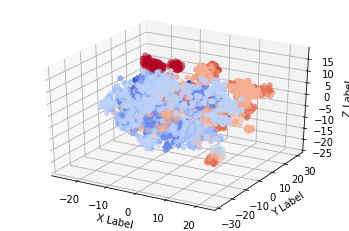

In [92]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(tsne3_results[:,0],tsne3_results[:,1],tsne3_results[:,2],c =colorids, cmap=colormap)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

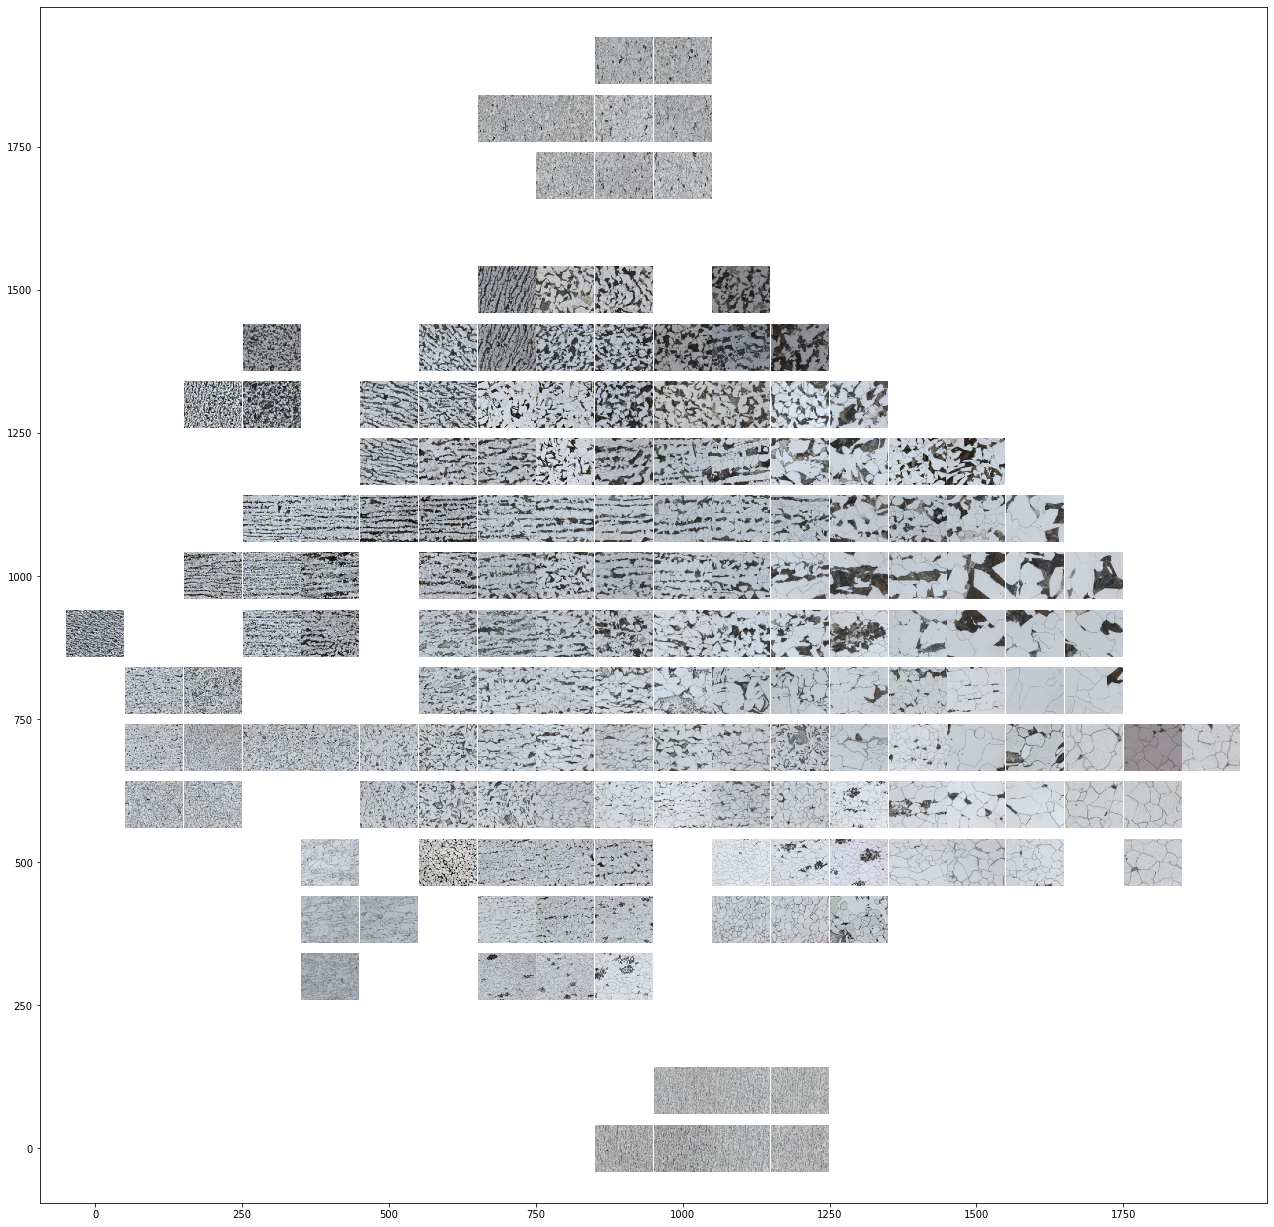

In [93]:
tsne_to_grid_plotter_manual(tsne_results[:,0], tsne_results[:,1],selected_filenames)

In [94]:
from   sklearn.decomposition  import PCA 
num_feature_dimensions=100
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [95]:
# Explain the importance of first 20 features
print(pca.explained_variance_ratio_[0:20])

[0.09273046 0.0808969  0.05657407 0.02658512 0.01815935 0.0154383
 0.01433276 0.01164185 0.01065518 0.00947832 0.00899888 0.00863898
 0.00780943 0.00697261 0.006498   0.00568758 0.00551164 0.00520991
 0.00513432 0.00492576]


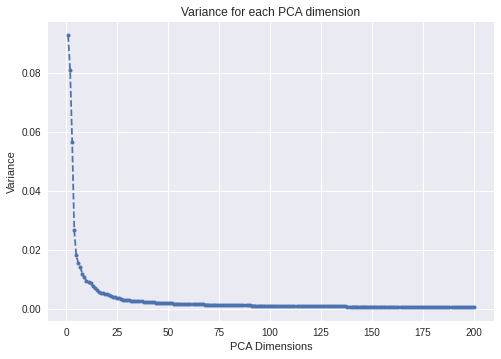

In [96]:
pca = PCA(200)
pca.fit(feature_list)

plt.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

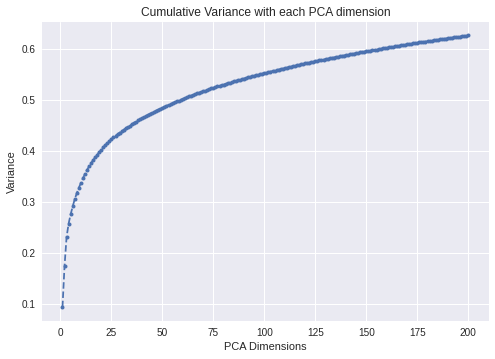

In [97]:
plt.plot(range(1,201),pca.explained_variance_ratio_.cumsum(),'o--', markersize=4)
plt.title ('Cumulative Variance with each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [98]:
!pip install pytorch-metric-learning

     |████████████████████████████████| 105 kB 14.6 MB/s 


In [99]:
import pytorch_metric_learning

In [100]:
from pytorch_metric_learning.utils import accuracy_calculator

In [102]:
pca_dimensions = [1,2,3,4,5,10,20,50,75,100,150,200]
pca_accuracy = []
pca_time = []

from sklearn.metrics import accuracy_score


for dimensions in pca_dimensions:
    # Perform PCA
    pca = PCA(n_components = dimensions)
    pca.fit(feature_list)
    feature_list_compressed = pca.transform(feature_list[:])
    # Calculate accuracy over the compressed features
    accuracy_calculator(feature_list_compressed[:],feauture_list)
    pca_time.append(time_taken)
    pca_accuracy.append(accuracy)
    print("For PCA Dimensions = ", dimensions, ",\tAccuracy = ",accuracy,"%",
",\tTime = ", pca_time[-1])

NameError: ignored

In [ ]:
plt.plot(pca_time, pca_accuracy,'o--', markersize=4)
for label, x, y in zip(pca_dimensions, pca_time,pca_accuracy):
    plt.annotate(label, xy=(x, y), ha='right', va='bottom')
plt.title ('Test Time vs Accuracy for each PCA dimension')
plt.xlabel('Test Time')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()